# Projecte Data Mining
Daniel Mariño i Gabriel Guardiola

In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, train_test_split
import sklearn.neighbors as nb

from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.utils import shuffle

from sklearn.naive_bayes import BernoulliNB
from statsmodels.stats.proportion import proportion_confint
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn import tree
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier




## Preprocessing

In [3]:
# Initzialicem les dades 
dset = pd.read_csv('train.csv')
dset.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [4]:
dset.shape

(103904, 25)

El nostre dataset té 103.904 entrades y 25 columnes sense preprocessar.

In [5]:
dset.describe()

Unnamed: 0             id            Age  Flight Distance  \
count  103904.000000  103904.000000  103904.000000    103904.000000   
mean    51951.500000   64924.210502      39.379706      1189.448375   
std     29994.645522   37463.812252      15.114964       997.147281   
min         0.000000       1.000000       7.000000        31.000000   
25%     25975.750000   32533.750000      27.000000       414.000000   
50%     51951.500000   64856.500000      40.000000       843.000000   
75%     77927.250000   97368.250000      51.000000      1743.000000   
max    103903.000000  129880.000000      85.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count          103904.000000                      103904.000000   
mean                2.729683                           3.060296   
std                 1.327829                           1.525075   
min                 0.000000                           0.000000   
25%                 2.000000                           2.000000   
50%                 3.000000                           3.000000   
75%                 4.000000                           4.000000   
max                 5.000000                           5.000000   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
count           103904.000000  103904.000000   103904.000000    103904.000000   
mean                 2.756901       2.976883        3.202129         3.250375   
std                  1.398929       1.277621        1.329533         1.349509   
min                  0.000000       0.000000        0.000000         0.000000   
25%                  2.000000       2.000000        2.000000         2.000000   
50%                  3.000000       3.000000        3.000000         3.000000   
75%                  4.000000       4.000000        4.000000         4.000000   
max                  5.000000       5.000000        5.000000         5.000000   

        Seat comfort  Inflight entertainment  On-board service  \
count  103904.000000           103904.000000     103904.000000   
mean        3.439396                3.358158          3.382363   
std         1.319088                1.332991          1.288354   
min         0.000000                0.000000          0.000000   
25%         2.000000                2.000000          2.000000   
50%         4.000000                4.000000          4.000000   
75%         5.000000                4.000000          4.000000   
max         5.000000                5.000000          5.000000   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
count     103904.000000     103904.000000    103904.000000     103904.000000   
mean           3.351055          3.631833         3.304290          3.640428   
std            1.315605          1.180903         1.265396          1.175663   
min            0.000000          1.000000         0.000000          0.000000   
25%            2.000000          3.000000         3.000000          3.000000   
50%            4.000000          4.000000         3.000000          4.000000   
75%            4.000000          5.000000         4.000000          5.000000   
max            5.000000          5.000000         5.000000          5.000000   

         Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  
count  103904.000000               103904.000000             103594.000000  
mean        3.286351                   14.815618                 15.178678  
std         1.312273                   38.230901                 38.698682  
min         0.000000                    0.000000                  0.000000  
25%         2.000000                    0.000000                  0.000000  
50%         3.000000                    0.000000                  0.000000  
75%         4.000000                   12.000000                 13.000000  
max         5.000000                 1592.000000               1584.000000

Podem observar dades interesants com el retard d'arribada mig (15 minuts) o el de sortida (14 minuts)

### Neteja de dades

Tenim que transformar les dades de text en valors numerics per poder treballar amb el dataset. 

El format serà el següent:

Gènere: Farem què Home → 0 i Dona  → 1

Tipus de client: Client deslleial → 0 i el lleial → 1

Tipus de viatge: Viatge personal → 0 i viatge de negocis → 1

Classe: Business → 0, Eco → 1, Eco plus → 2

Satisfacció: Neutral o insatisfet → 0 i satisfet → 1


In [6]:
gender_mapping = {'Male': 0, 'Female': 1}
dset['Gender'] = dset['Gender'].map(gender_mapping)


customer_type_mapping = {'Loyal Customer': 1, 'disloyal Customer': 0}
dset['Customer Type'] = dset['Customer Type'].map(customer_type_mapping)

type_of_travel_mapping = {'Personal Travel': 0, 'Business travel': 1}
dset['Type of Travel'] = dset['Type of Travel'].map(type_of_travel_mapping)


class_mapping = {'Business': 0, 'Eco': 1, 'Eco Plus': 2}
dset['Class'] = dset['Class'].map(class_mapping)


satisfaction_mapping = {'neutral or dissatisfied': 0, 'satisfied': 1}
dset['satisfaction'] = dset['satisfaction'].map(satisfaction_mapping)


dset.to_csv('satisfaction.csv', index=False)

#treballem amb el nou csv
dset = pd.read_csv('satisfaction.csv')
dset.head()

Unnamed: 0      id  Gender  Customer Type  Age  Type of Travel  Class  \
0           0   70172       0              1   13               0      2   
1           1    5047       0              0   25               1      0   
2           2  110028       1              1   26               1      0   
3           3   24026       1              1   25               1      0   
4           4  119299       0              1   61               1      0   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   ...  Inflight entertainment  On-board service  Leg room service  \
0  ...                       5                 4                 3   
1  ...                       1                 1                 5   
2  ...                       5                 4                 3   
3  ...                       2                 2                 5   
4  ...                       3                 3                 4   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction  
0                          25                      18.0             0  
1                           1                       6.0             0  
2                           0                       0.0             1  
3                          11                       9.0             0  
4                           0                       0.0             1  

[5 rows x 25 columns]

Comprobem si hi han "missing values" (null)

In [7]:
dset.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

L' única columna amb valors nuls és la de retards d' arribada, amb un total de 310. 
Les substituïm per zero

In [8]:
dset['Arrival Delay in Minutes'] = dset['Arrival Delay in Minutes'].fillna(0)

#Comprobem:
dset.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

En aquesta mateixa columna, em detectat que el data type es float quan hauria de ser integer.

In [9]:
dset['Arrival Delay in Minutes'] = dset['Arrival Delay in Minutes'].astype('int64')

Eliminem la primera columna ja que no serveix per res

In [10]:
dset = dset.drop(dset.columns[0], axis=1)
#comprobem
dset.head()

id  Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0   70172       0              1   13               0      2              460   
1    5047       0              0   25               1      0              235   
2  110028       1              1   26               1      0             1142   
3   24026       1              1   25               1      0              562   
4  119299       0              1   61               1      0              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0                       3  ...                       5                 4   
1                       3  ...                       1                 1   
2                       2  ...                       5                 4   
3                       5  ...                       2                 2   
4                       3  ...                       3                 3   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
0                 3                 4                4                 5   
1                 5                 3                1                 4   
2                 3                 4                4                 4   
3                 5                 3                1                 4   
4                 4                 4                3                 3   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0            5                          25                        18   
1            1                           1                         6   
2            5                           0                         0   
3            2                          11                         9   
4            3                           0                         0   

   satisfaction  
0             0  
1             0  
2             1  
3             0  
4             1  

[5 rows x 24 columns]

In [11]:
#guardem les dades preprocessades al csv
dset.to_csv('satisfaction.csv', index=False)

### Correlació de les dades

Per fer-nos una idea de la correlació que les dades tenen entre si, generarem un mapa de calor:

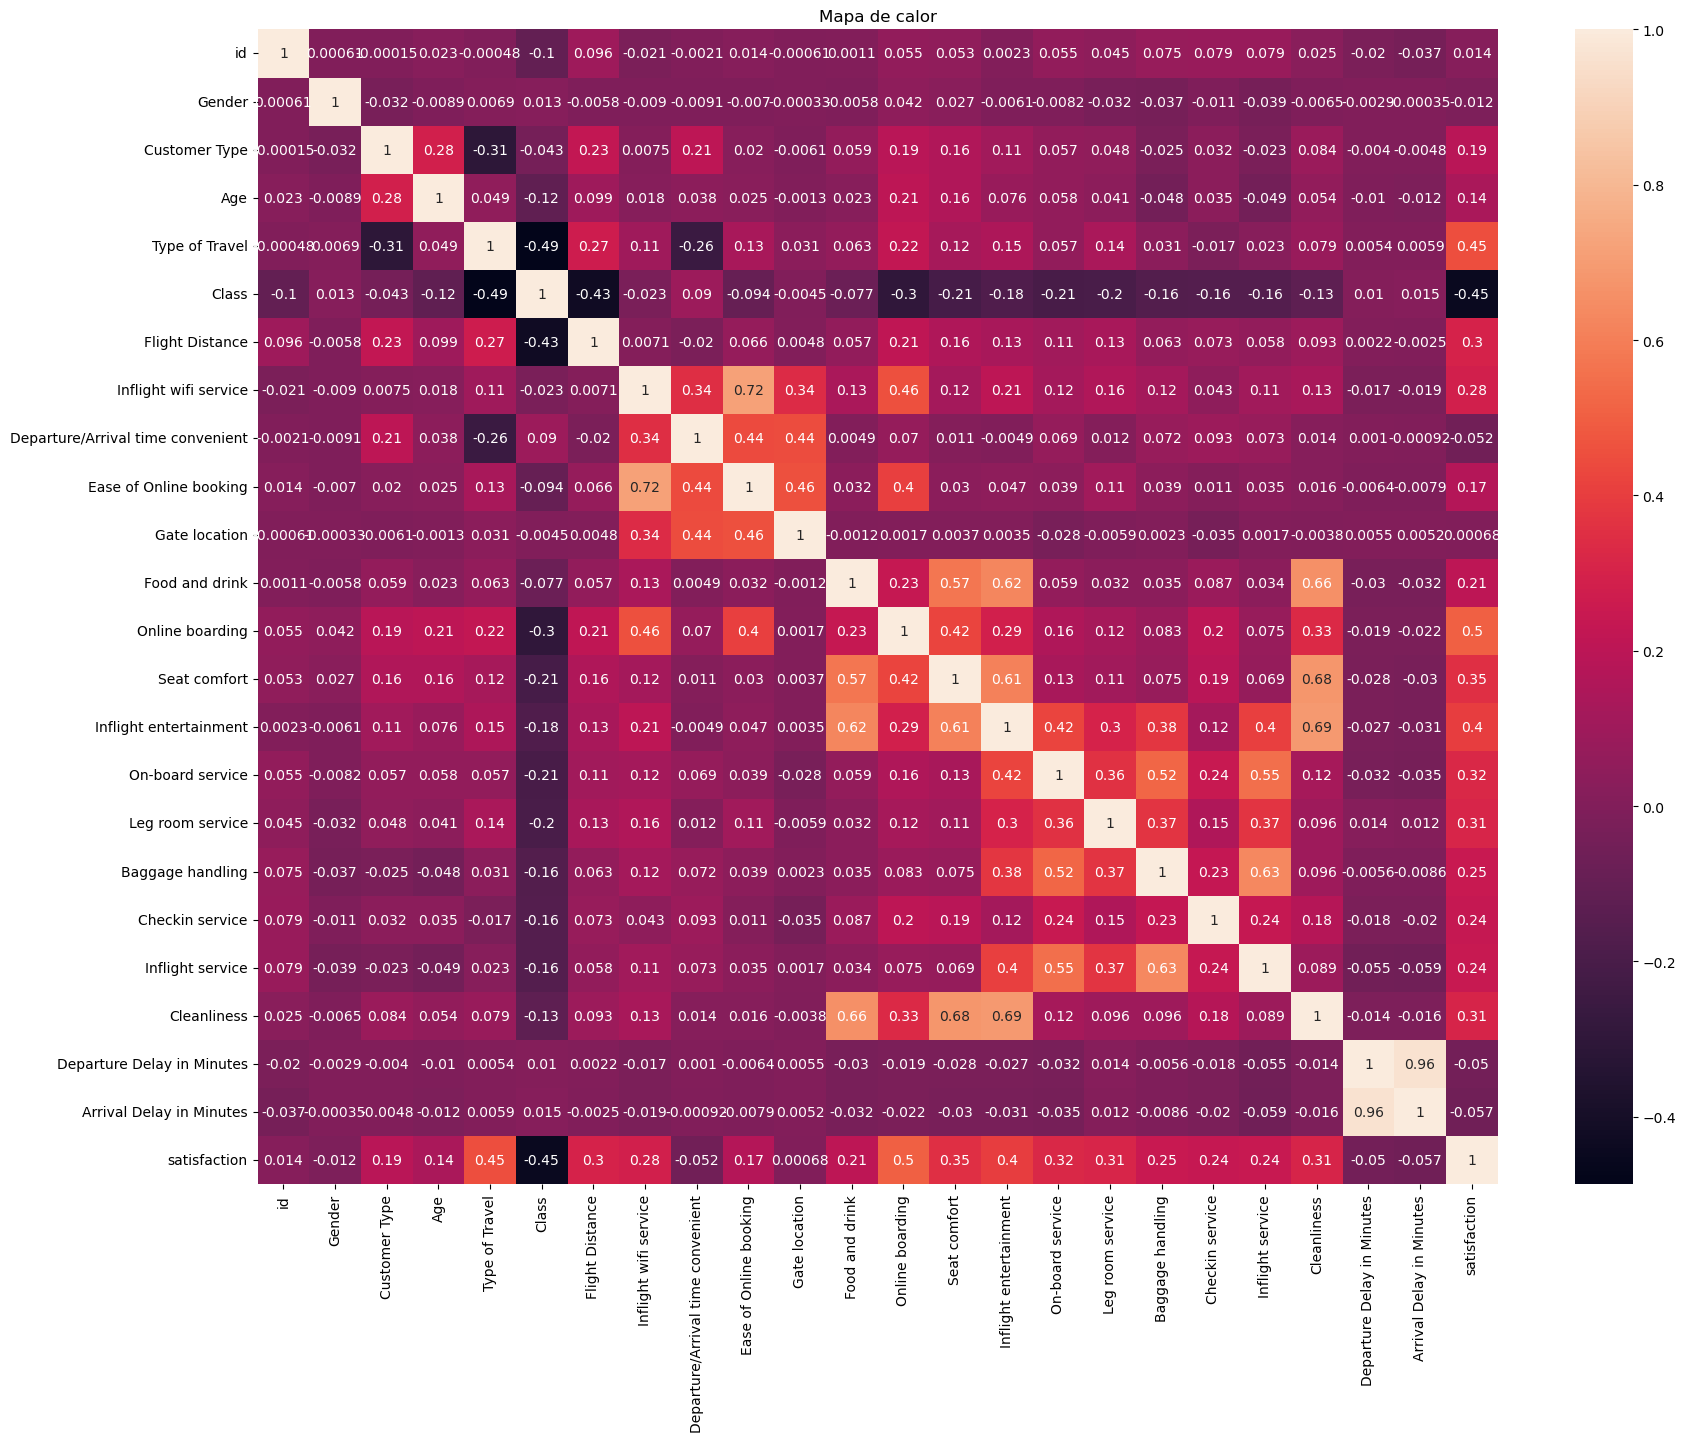

In [12]:
crelation = dset.corr()
plt.figure(figsize=(20,15))
sns.heatmap(crelation, annot=True)
plt.title('Mapa de calor')
plt.show()

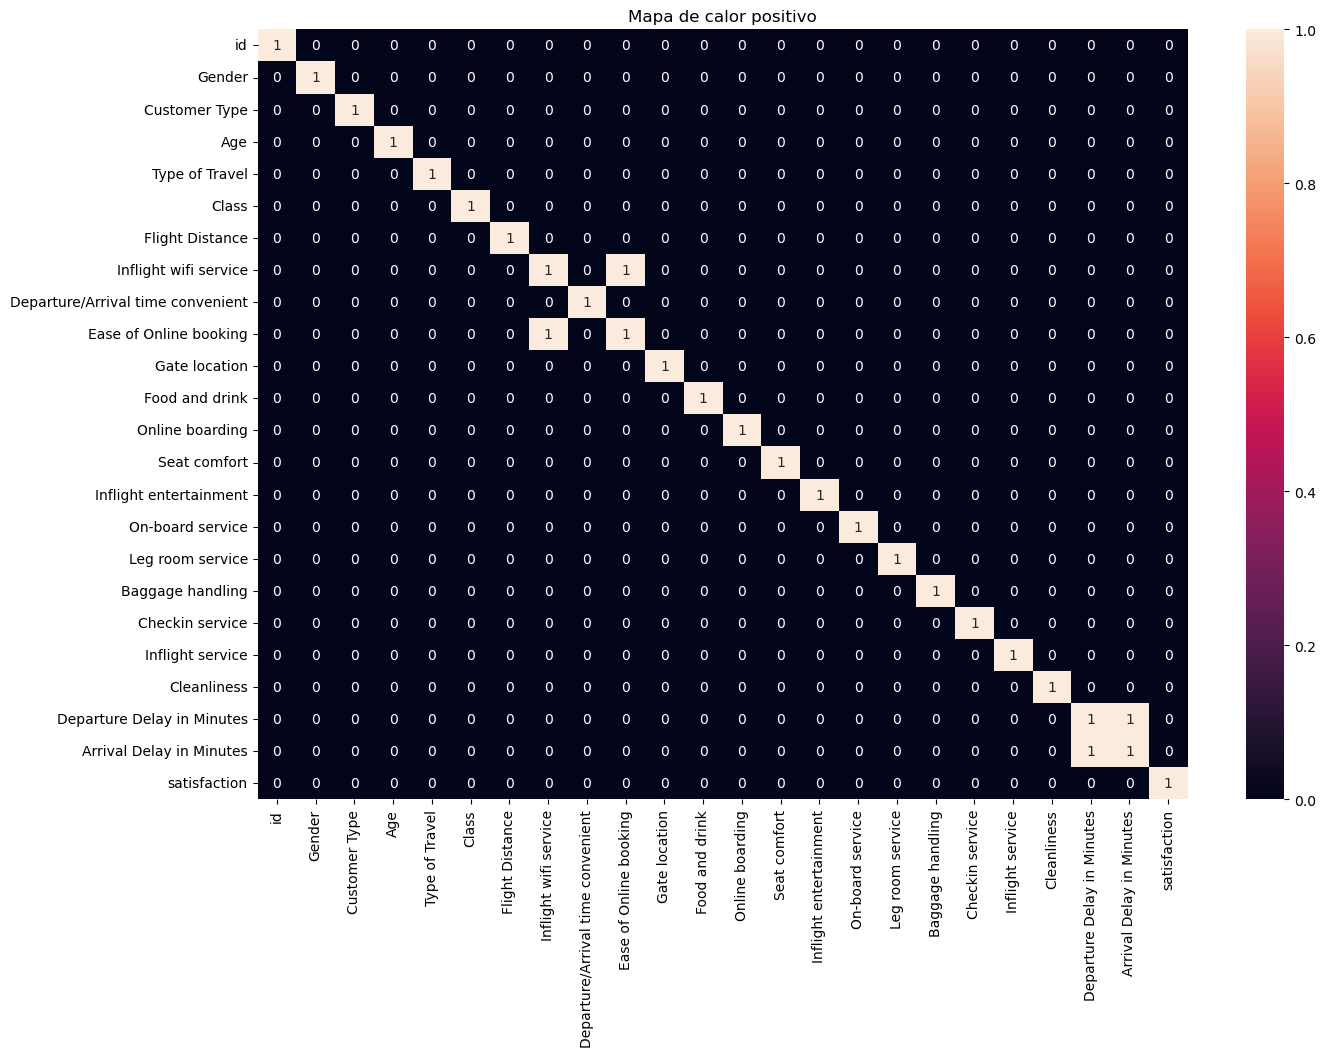

In [13]:
crelation = dset.corr()
crelation = (crelation>=0.7).astype('int')
plt.figure(figsize=(15,10))
plt.title('Mapa de calor positivo')
sns.heatmap(crelation, annot=True)
plt.show()

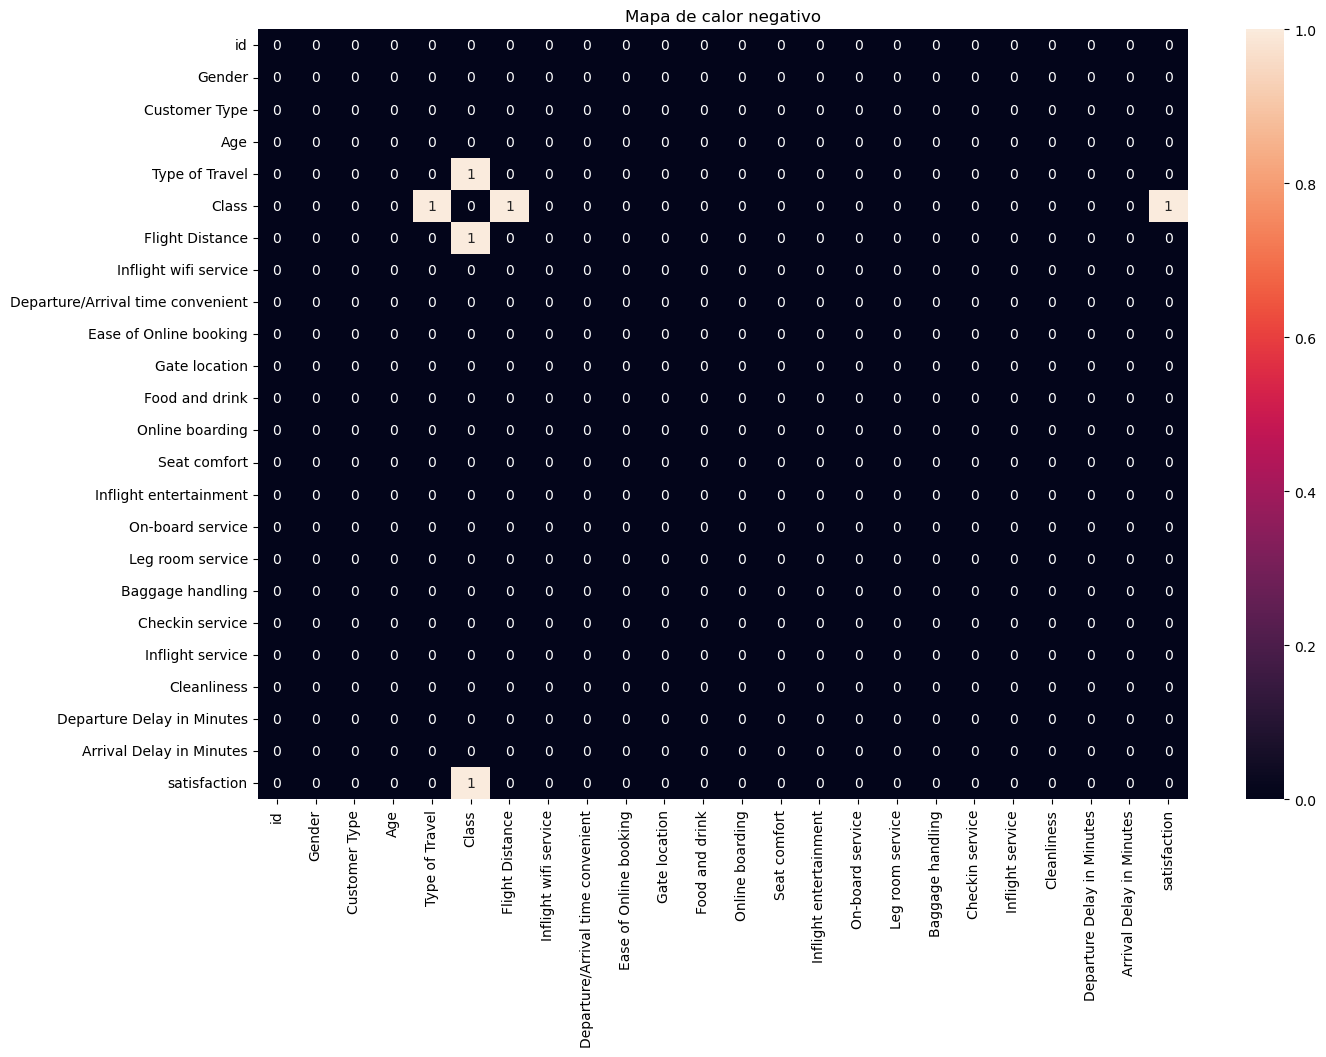

In [14]:
crelation = dset.corr()
crelation = (crelation<=-0.4).astype('int')
plt.figure(figsize=(15,10))
plt.title('Mapa de calor negativo')
sns.heatmap(crelation, annot=True)
plt.show()

### Outliers

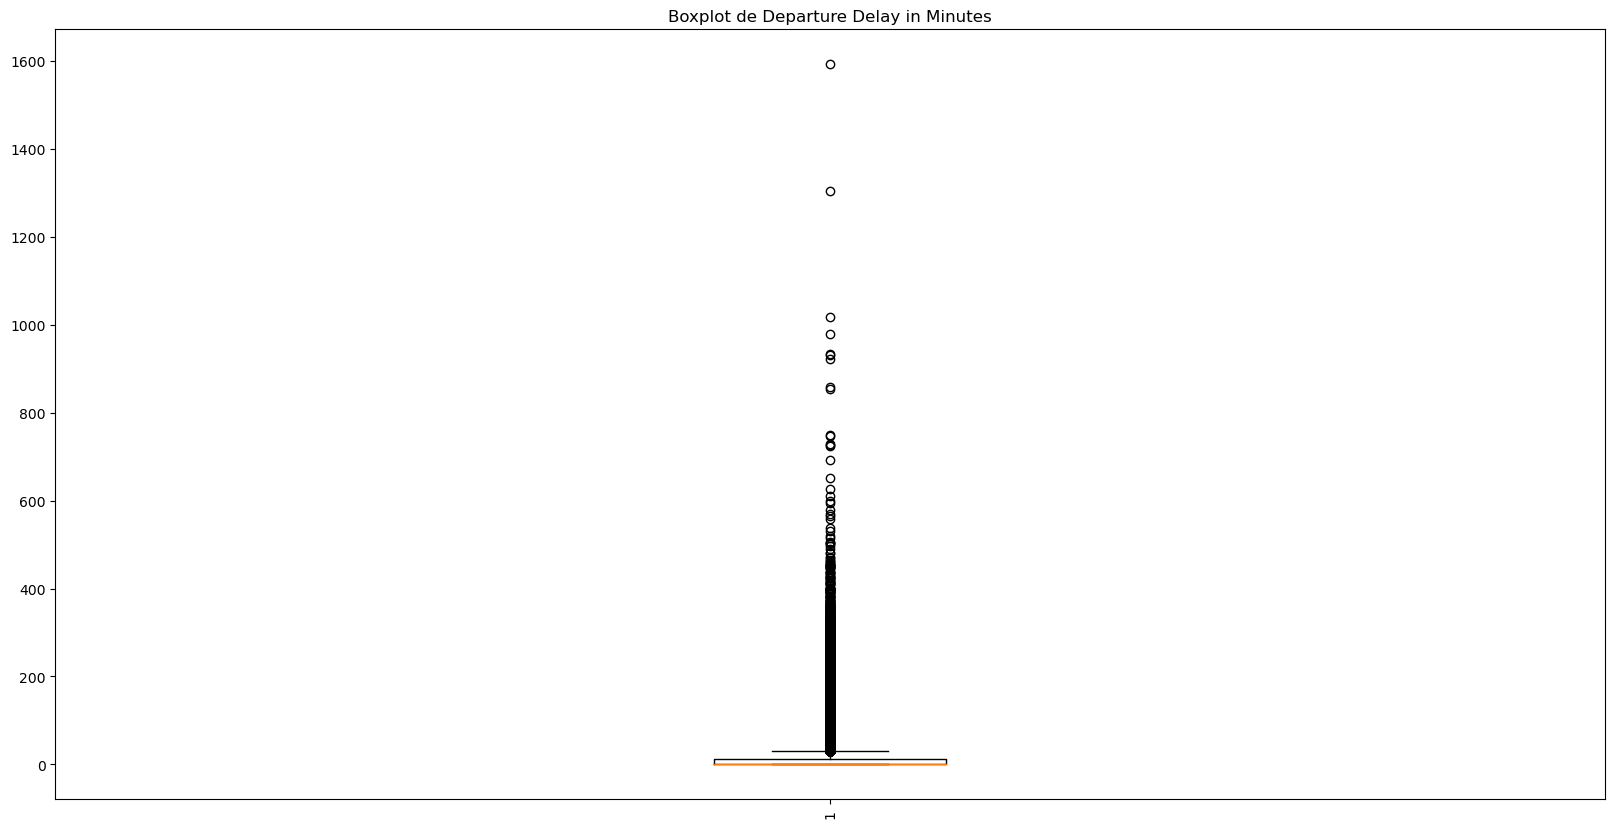

Valors atípics en la columna Departure Delay in Minutes:
14         43
16         49
22         52
24         54
32        109
         ... 
103869    212
103881     54
103885     47
103891     35
103892    110
Name: Departure Delay in Minutes, Length: 14529, dtype: int64
Quantitat de valors atípics en la columna Departure Delay in Minutes: 14529
Quantitat de valors iguals a 0 en la columna Departure Delay in Minutes: 58668


In [15]:
columna_interes = 'Departure Delay in Minutes'
data = dset[columna_interes]

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

plt.boxplot(data)
plt.title(f'Boxplot de {columna_interes}')
plt.show()

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

print(f'Valors atípics en la columna {columna_interes}:')
outliers_data = data[outliers]
print(outliers_data)
print(f'Quantitat de valors atípics en la columna {columna_interes}: {len(outliers_data)}')
count_zeros = (data == 0).sum()
print(f'Quantitat de valors iguals a 0 en la columna {columna_interes}: {count_zeros}')

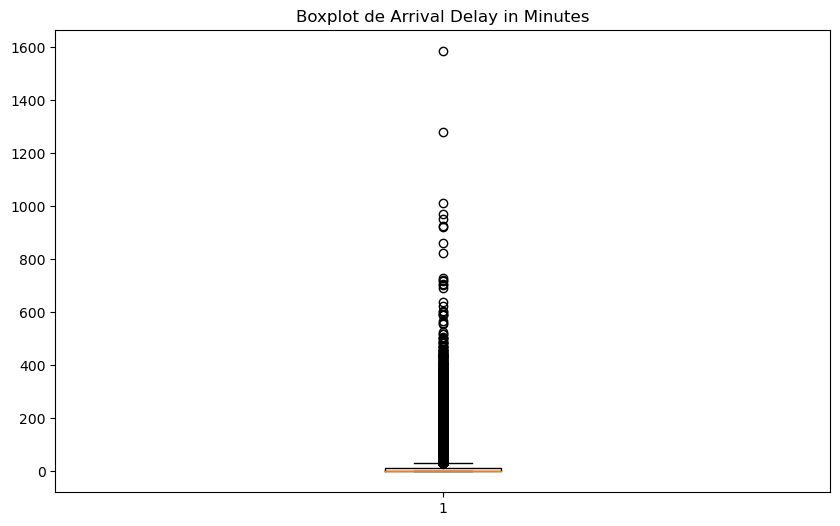

Valores atípicos en la columna Arrival Delay in Minutes:
14         35
16         51
24         44
32        120
55         48
         ... 
103843    156
103854     37
103869    206
103881     51
103892    121
Name: Arrival Delay in Minutes, Length: 13954, dtype: int64
Cantidad de valores atípicos en la columna Arrival Delay in Minutes: 13954
Cantidad de valores igual a 0 en la columna Arrival Delay in Minutes: 58469


In [16]:
columna_interes = 'Arrival Delay in Minutes'
data = dset[columna_interes]

plt.figure(figsize=(10, 6))

plt.boxplot(data)
plt.title(f'Boxplot de {columna_interes}')
plt.show()

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

print(f'Valores atípicos en la columna {columna_interes}:')
outliers_data = data[outliers]
print(outliers_data)
print(f'Cantidad de valores atípicos en la columna {columna_interes}: {len(outliers_data)}')
count_zeros = (data == 0).sum()
print(f'Cantidad de valores igual a 0 en la columna {columna_interes}: {count_zeros}')

# Naive Bayes

In [17]:
X = dset.drop(['satisfaction'],axis=1).values
Y = dset['satisfaction'].values
print(X.shape)
print(Y.shape)

(103904, 23)
(103904,)


In [18]:
cv = StratifiedKFold(n_splits=10) 
gnb = GaussianNB()
cv_scores = cross_val_score(gnb,X=X,y=Y,cv=cv)
np.mean(cv_scores)

0.8078611765993913

In [19]:
pdict = cross_val_predict(GaussianNB(), X=X, y=Y,  cv=cv)  

print(confusion_matrix(Y, pdict))
print(accuracy_score(Y, pdict))

[[47988 10891]
 [ 9073 35952]]
0.8078611025562057


In [20]:
print(classification_report(Y, pdict))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83     58879
           1       0.77      0.80      0.78     45025

    accuracy                           0.81    103904
   macro avg       0.80      0.81      0.81    103904
weighted avg       0.81      0.81      0.81    103904



# KNN

In [21]:
#Dividimos el modelo para hacer cross-validation. Testeamos el 30%
trainedX, testedX, trainedY, testedY = train_test_split(X, Y, test_size=.3, random_state=1)
knc = nb.KNeighborsClassifier()
knc.fit(trainedX, trainedY)

#Precisión de los datos
print(knc.score(testedX, testedY))

0.6661747722314898


In [33]:
#matriz de confusión
pdictKnn = knc.predict(testedX)
print(confusion_matrix(testedY, pdictKnn))

[[12905  4787]
 [ 5619  7861]]


In [34]:
print(classification_report(testedY, pdictKnn))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71     17692
           1       0.62      0.58      0.60     13480

    accuracy                           0.67     31172
   macro avg       0.66      0.66      0.66     31172
weighted avg       0.66      0.67      0.66     31172



## KNN Cross-Validation

In [26]:
pdictknncv = cross_val_predict(nb.KNeighborsClassifier(), X=X, y=Y,  cv=10)  
print(confusion_matrix(Y, pdictknncv))
print(accuracy_score(Y, pdictknncv))

[[43272 15607]
 [18045 26980]]
0.6761241145672929


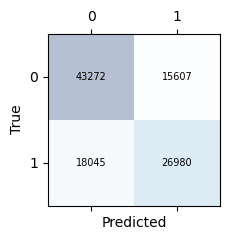

In [53]:
cmx = confusion_matrix(Y, pdictknncv)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(cmx, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cmx.shape[0]):
    for j in range(cmx.shape[1]):
        ax.text(x=j, y=i, s=cmx[i, j], va='center', ha='center',fontsize=7)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.savefig('cmx.png', dpi=600)
plt.show()

In [56]:
print(metrics.classification_report(Y, pdictknncv))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72     58879
           1       0.63      0.60      0.62     45025

    accuracy                           0.68    103904
   macro avg       0.67      0.67      0.67    103904
weighted avg       0.67      0.68      0.67    103904



In [57]:
#K testing
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=1), X=trainedX, y=trainedY,  cv=10)  
print("Precisión para 1 neighbors - ", np.mean(cv_scores))
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=3), X=trainedX, y=trainedY,  cv=10)  
print("Precisión para 3 neighbors - ",  np.mean(cv_scores))
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=5), X=trainedX, y=trainedY,  cv=10)  
print("Precisión para 5 neighbors - ",  np.mean(cv_scores))
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=7), X=trainedX, y=trainedY,  cv=10)  
print("Precisión para 7 neighbors - ",  np.mean(cv_scores))
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=9), X=trainedX, y=trainedY,  cv=10)  
print("Precisión para 9 neighbors - ",  np.mean(cv_scores))

Precisión para 1 neighbors -  0.6367899040602035
Precisión para 3 neighbors -  0.6597785278267903
Precisión para 5 neighbors -  0.6692379235806152
Precisión para 7 neighbors -  0.6697328067271989
Precisión para 9 neighbors -  0.6710939433048686


In [58]:
#K testing with Distance Weighting
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=1,weights='distance'), X=trainedX, y=trainedY,  cv=10)  
print("Precisión para 1 neighbors DW - ", np.mean(cv_scores))
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=3,weights='distance'), X=trainedX, y=trainedY,  cv=10)  
print("Precisión para 3 neighbors DW - ",  np.mean(cv_scores))
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=5,weights='distance'), X=trainedX, y=trainedY,  cv=10)  
print("Precisión para 5 neighbors DW - ",  np.mean(cv_scores))
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=7,weights='distance'), X=trainedX, y=trainedY,  cv=10)  
print("Precisión para 7 neighbors DW - ",  np.mean(cv_scores))
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=9,weights='distance'), X=trainedX, y=trainedY,  cv=10)  
print("Precisión para 9 neighbors DW - ",  np.mean(cv_scores))

Precisión para 1 neighbors DW -  0.6367899040602035
Precisión para 3 neighbors DW -  0.657839911014335
Precisión para 5 neighbors DW -  0.6690454289088712
Precisión para 7 neighbors DW -  0.6740638565069481
Precisión para 9 neighbors DW -  0.6770611117892812


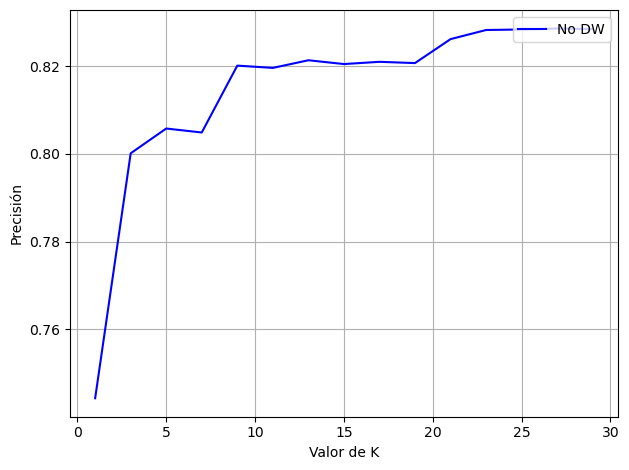

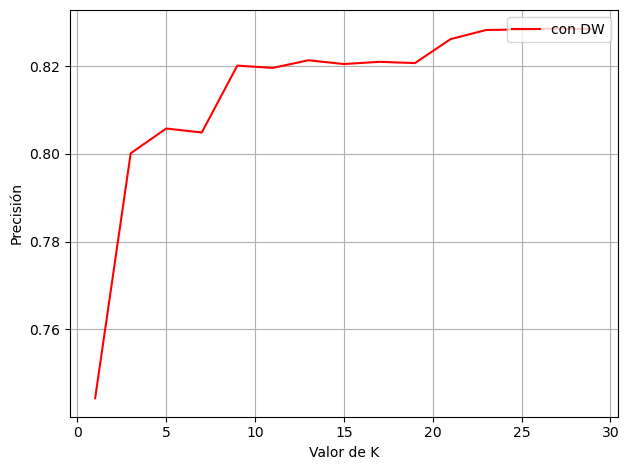

In [63]:
kBestX = SelectKBest(mutual_info_classif, k=2).fit_transform(X, Y)
noDW = []
withDW = []

for kn in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=kn), X=kBestX, y=Y, cv=10)
    noDW.append(np.mean(cv_scores))
plt.plot(range(1,30,2),noDW,'b',label='No DW')
plt.xlabel('Valor de K')
plt.ylabel('Precisión')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.show()
for kn in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=kn,weights='distance'), X=kBestX, y=Y, cv=10)
    withDW.append(np.mean(cv_scores))
plt.plot(range(1,30,2),withDW,'r',label='con DW')
plt.xlabel('Valor de K')
plt.ylabel('Precisión')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.show()

# DT - Decision Trees

In [22]:
X=dset.drop(['satisfaction'], axis=1)
Y=dset['satisfaction']

Xn=pd.get_dummies(X)
Xn.head()

id  Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0   70172       0              1   13               0      2              460   
1    5047       0              0   25               1      0              235   
2  110028       1              1   26               1      0             1142   
3   24026       1              1   25               1      0              562   
4  119299       0              1   61               1      0              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  ...  Seat comfort  Inflight entertainment  \
0                       3  ...             5                       5   
1                       3  ...             1                       1   
2                       2  ...             5                       5   
3                       5  ...             2                       2   
4                       3  ...             5                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes  
0                        18  
1                         6  
2                         0  
3                         9  
4                         0  

[5 rows x 23 columns]

In [23]:
Xn, Y = shuffle(Xn, Y)
(trainedX, testedX, trainedY, testedY) = train_test_split(Xn, Y, test_size=.3, random_state=10)

In [24]:
clf = BernoulliNB()
pred = clf.fit(trainedX, trainedY).predict(testedX)
print(confusion_matrix(testedY, pred))
print()
print("Precisión:", accuracy_score(testedY, pred))
print()
print(classification_report(testedY, pred))
epsilon = accuracy_score(testedY, pred)

[[13657  4056]
 [ 2877 10582]]

Precisión: 0.7775888617990504

              precision    recall  f1-score   support

           0       0.83      0.77      0.80     17713
           1       0.72      0.79      0.75     13459

    accuracy                           0.78     31172
   macro avg       0.77      0.78      0.78     31172
weighted avg       0.78      0.78      0.78     31172



In [25]:
scores = cross_val_score(clf, Xn, Y, cv=10)
print(scores)
print("Media: ", np.mean(scores))

[0.77499759 0.77721105 0.77538254 0.78000192 0.77921078 0.77718961
 0.78363811 0.77882579 0.78065448 0.77401347]
Media:  0.7781125351962521


In [28]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

clf = tree.DecisionTreeClassifier(criterion='entropy')

param_dist = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(trainedX, trainedY)

best_params = random_search.best_params_
print("Mejores parámetros:", best_params)

Mejores parámetros: {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 14}


[[16280  1433]
 [ 1557 11902]]

Precisión: 0.9040805851405107

              precision    recall  f1-score   support

           0       0.91      0.92      0.92     17713
           1       0.89      0.88      0.89     13459

    accuracy                           0.90     31172
   macro avg       0.90      0.90      0.90     31172
weighted avg       0.90      0.90      0.90     31172



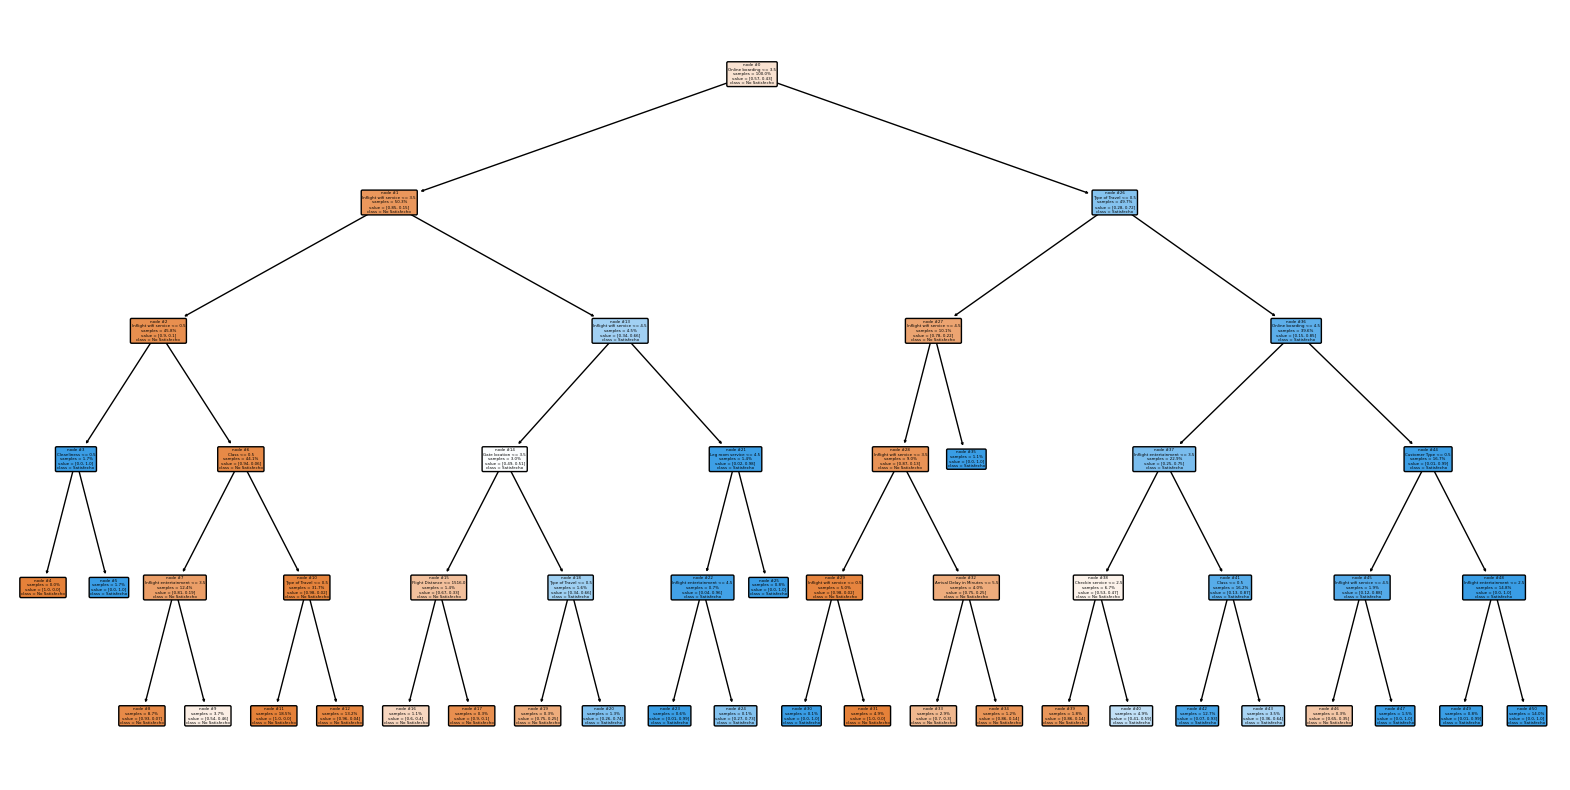

In [34]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5, min_samples_leaf=2)
pred = clf.fit(trainedX, trainedY).predict(testedX)
print(confusion_matrix(testedY, pred))
print()
print("Precisión:", accuracy_score(testedY, pred))
print()
print(classification_report(testedY, pred))
epsilon = accuracy_score(testedY, pred)

fig = plt.gcf()
fig.set_size_inches(200, 100)

tree.plot_tree(clf, filled=True,rounded=True,feature_names=list(Xn.columns.values))
fig.savefig('DT_trains.png')
plt.show()

#focus leaf
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=list(Xn.columns.values), class_names=['No Satisfecho', 'Satisfecho'], filled=True, rounded=True,
          precision=2, proportion=True, node_ids=True, impurity=False)
fig.savefig('DT_trains_focusedleaf.png')

plt.show()

In [42]:
ros = RandomOverSampler()

Xs = dset.iloc[:,:-1]
Ys = dset['satisfaction']

Xs,Ys = ros.fit_resample(Xs,Ys)
scores = cross_val_score(clf, Xn, Y, cv=10)
print(scores)
print("Media: ", np.mean(scores))

[0.95014917 0.94601097 0.95014917 0.94706958 0.94966314 0.94533205
 0.9520693  0.94879692 0.94947064 0.94879692]
Media:  0.9487507855737676


# SVM

In [2]:
dset = pd.read_csv('satisfaction.csv')
X=dset.drop(['satisfaction'], axis=1)
y=dset['satisfaction']

print(X.shape)
X.head()

(103904, 23)


id  Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0   70172       0              1   13               0      2              460   
1    5047       0              0   25               1      0              235   
2  110028       1              1   26               1      0             1142   
3   24026       1              1   25               1      0              562   
4  119299       0              1   61               1      0              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  ...  Seat comfort  Inflight entertainment  \
0                       3  ...             5                       5   
1                       3  ...             1                       1   
2                       2  ...             5                       5   
3                       5  ...             2                       2   
4                       3  ...             5                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes  
0                        18  
1                         6  
2                         0  
3                         9  
4                         0  

[5 rows x 23 columns]

In [3]:
(trainedX, testedX,  trainedY, testedY) = train_test_split(X, y, test_size=.3, stratify = y,random_state=1)

In [4]:
scaler = MinMaxScaler(feature_range=(-1, 1)).fit(trainedX)
trainedX = scaler.transform(trainedX)
testedX = scaler.transform(testedX)

### Linear SVM

In [ ]:
svm_model = SVC()

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': [0.1, 1, 'auto']}

grid_search = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(trainedX, trainedY)

best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)
best_svm_model = SVC(**best_params)
best_svm_model.fit(trainedX, trainedY)

In [ ]:
y_pred = best_svm_model.predict(testedX)

accuracy = accuracy_score(testedY, y_pred)
conf_matrix = confusion_matrix(testedY, y_pred)
classification_rep = classification_report(testedY, y_pred)

print("Precisión:", accuracy)
print("Matriz de confusión:\n", conf_matrix)
print("Informe de clasificación:\n", classification_rep)

In [ ]:
print("Cantidad de vectores de soporte:", len(best_svm_model.support_vectors_))

In [ ]:
results = grid_search.cv_results_
C_values = results['param_C']
gamma_values = results['param_gamma']
scores = results['mean_test_score']
C_numeric = [float(c) for c in C_values]
gamma_numeric = [float(g) if g != 'scale' and g != 'auto' else 0 for g in gamma_values]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scat = ax.scatter(C_numeric, gamma_numeric, scores, c=scores, cmap='viridis')

ax.set_title('Precisión de SVM en diferentes valores de C y gamma')
ax.set_xlabel('C')
ax.set_ylabel('Gamma')
ax.set_zlabel('Precisión')
plt.colorbar(scat)
plt.show()

## Meta-Learning algorithms

### Majority Voting

In [ ]:
model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = SVC(probability=True) 

voting_clf = VotingClassifier(estimators=[('lr', model1), ('knn', model2), ('svm', model3)], voting='soft')
scores = cross_val_score(voting_clf, X_train, trainedY, cv=5, scoring='accuracy')
print("Precisión del Majority Voting:", scores.mean())

### Bagging

In [ ]:
base_classifier = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bagging_clf.fit(trainedX, trainedY)

accuracy_bagging = bagging_clf.score(testedX, testedY)
print("Precisión del Bagging:", accuracy_bagging)

### Random Forest

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(trainedX, trainedY)

accuracy_rf = rf_clf.score(testedX, testedY)
print("Precisión del RandomForest:", accuracy_rf)

### AdaBoost

In [ ]:
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_clf = AdaBoostClassifier(base_classifier, n_estimators=50, learning_rate=1.0, random_state=42)

adaboost_clf.fit(trainedX, trainedY)
accuracy_adaboost = adaboost_clf.score(testedX, testedY)
print("Precisión de AdaBoost:", accuracy_adaboost)